### 1. Download Tickets Data

### 2. Tickets Data Exploration

Load tickets data as dataframe

In [1]:
import pandas as pd
import numpy as np
import textwrap

In [2]:
# read file into pandas using a relative path. Please change the path as needed
tix_df = pd.read_table('all_tickets.csv', sep=',')

In [3]:
#Total number of tickets
tix_df.shape

(48549, 9)

In [4]:
#Columns in the dataframe
tix_df.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

In [5]:
#Check the contents of dataframe
tix_df.sample(n=5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
2103,new purchase po,purchase po dear purchased type hub please log...,1,5,13,7,32,3,4
44441,approval list not working,sent wednesday march approval list working hi ...,0,4,9,23,10,1,3
3737,update for florin technology employee,update hi please best regards analyst november...,1,4,2,21,67,3,4
5390,submission,problems submission hello had two leave days o...,1,4,2,105,66,3,4
24558,po,tuesday december po morning adaptor male femal...,1,5,13,7,32,3,4


Checking ticket content

In [6]:
my_wrap = textwrap.TextWrapper()

In [7]:
tix_num = np.random.randint(0, tix_df.shape[0])
print('Title: ')
print(tix_df.loc[tix_num, 'title'])
print('Body: ')
for line in my_wrap.wrap(tix_df.loc[tix_num, 'body']):
    print(line)

Title: 
access to confluence
Body: 
october confluence hello please confluence section thanks application
senior engineer registered under number whose registered old broad
street kingdom provide clients each subsidiaries separate entity has


In [8]:
#Checkout missing values
tix_df.isnull().sum()

title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

Visualization

In [9]:
#Ticket type
tix_df['ticket_type'].value_counts().plot(kind='barh')

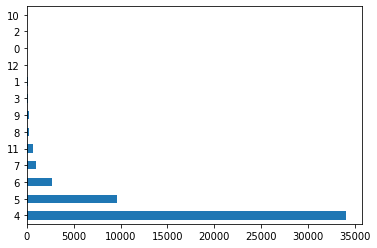

In [10]:
#Category
tix_df['category'].value_counts().plot(kind='barh')

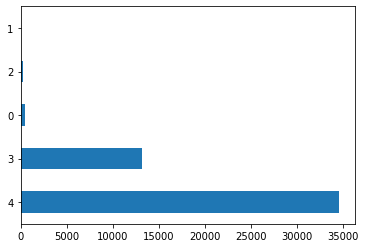

In [11]:
#Impact
tix_df['impact'].value_counts().plot(kind='barh')

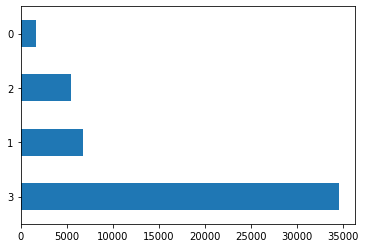

In [12]:
#Urgency
tix_df['urgency'].value_counts().plot(kind='barh')

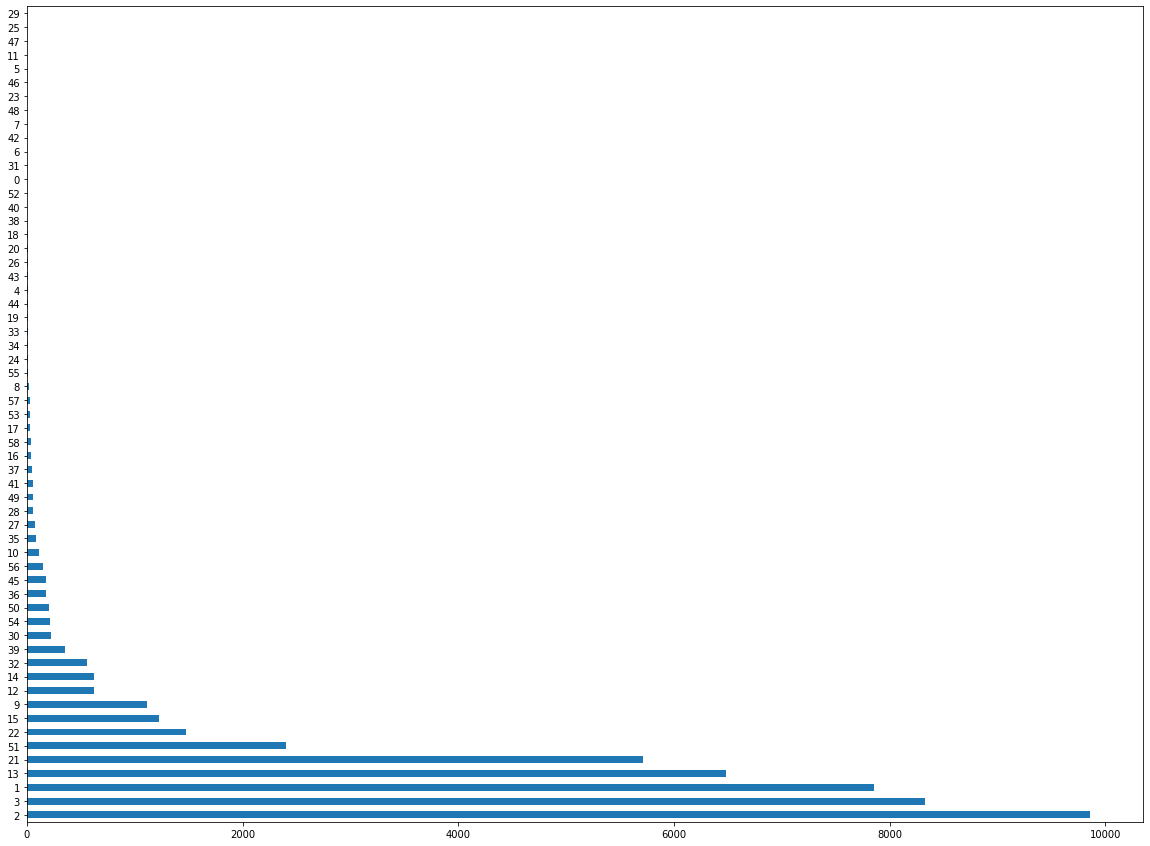

In [13]:
#Sub-category 1
tix_df['sub_category1'].value_counts().plot(kind='barh', figsize=(20,15))

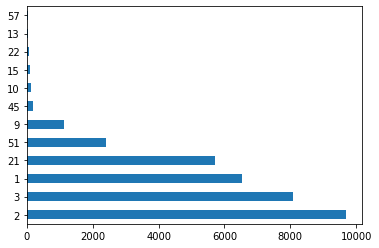

In [14]:
#Sub-category 1 for specific category
tix_df[tix_df['category'].isin(['4'])]['sub_category1'].value_counts().plot(kind='barh')

### 3. Create Training & Test Dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Build a new Columns which combines 'title' and 'body'
tix_df['title_body'] = tix_df['title'].astype('str') + tix_df['body']

#Column to predict
column_to_predict = 'ticket_type'

In [17]:
# split X and y into training and testing sets
trainX, testX, trainY, testY = train_test_split(tix_df['title_body'], tix_df[column_to_predict], random_state=2)

In [18]:
#Traing data
print(trainX.shape)
print(trainY.shape)

(36411,)
(36411,)


In [19]:
#Test Data
print(testX.shape)
print(testY.shape)

(12138,)
(12138,)


### 4. Tokenization & Vectorization

Using **CountVectorizer**, to get numeric features.

In [20]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()

In [21]:
#Feed SMS data to CountVectorizer
cvect.fit(trainX)

#Check the vocablury size
len(cvect.vocabulary_)

24694

In [22]:
#What is there in the vocabulary
cvect.get_feature_names()

['aaction',
 'ab',
 'abandon',
 'abandoned',
 'abbott',
 'abc',
 'abeam',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'aboard',
 'abort',
 'aborted',
 'aborting',
 'about',
 'aboutabout',
 'aboutjuly',
 'aboutquestion',
 'aboutthursday',
 'abouttuesday',
 'above',
 'abroad',
 'abroken',
 'abs',
 'absence',
 'absencejuly',
 'absencepm',
 'absences',
 'absencesent',
 'absencesod',
 'absencessent',
 'absencesthursday',
 'absenceswithdrawn',
 'absencetuesday',
 'absent',
 'absolute',
 'absolutely',
 'absorption',
 'abstract',
 'absurd',
 'absurdly',
 'abuse',
 'abused',
 'ac',
 'academic',
 'academy',
 'academyfebruary',
 'academythursday',
 'academywednesday',
 'acan',
 'accelerate',
 'accelerated',
 'accelerates',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessability',
 'accessable',
 'accessaccess',
 'accessad',
 'accessadministrators',
 'ac

#### How do we reduce Vocabulary?

1. Stemming / Lemmatization
2. Remove Stop words
3. Remove words who appear very rarely (min_df)
4. Remove words which appear a lot (max_df)

In [23]:
#Stemming
from nltk.stem import PorterStemmer

Build a new CountVectorizer with stemmer

In [24]:
analyzer = CountVectorizer().build_analyzer()
stemmer = PorterStemmer()

In [25]:
#Function to Stem words
def get_stemmed_text(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [26]:
stem_cvectorizer = CountVectorizer(analyzer=get_stemmed_text)

In [27]:
#This will take few seconfs
stem_cvectorizer.fit(trainX)

#Vocabulary
len(stem_cvectorizer.get_feature_names())

19587

With stemmer and minimum frequency

In [28]:
stem_min_cvectorizer = CountVectorizer(analyzer=get_stemmed_text, min_df=5)

In [29]:
#This will take few seconfs
stem_min_cvectorizer.fit(trainX)

#Vocabulary
len(stem_min_cvectorizer.get_feature_names())

4816

In [30]:
#stem_min_cvectorizer.vocabulary_

Build Document-term Matrix (DTM)

In [31]:
#Convert Training text into Count Vectors
trainX_ct = stem_min_cvectorizer.transform(trainX)

In [32]:
#Size of Document Term Matrix
trainX_ct.shape

(36411, 4816)

In [33]:
#Let's check the first record
trainX_ct[0]

<1x4816 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [34]:
#What's there in sparse matrix
print(trainX_ct[0])

  (0, 579)	1
  (0, 732)	1
  (0, 1908)	1
  (0, 1909)	1
  (0, 2131)	1
  (0, 2173)	3
  (0, 2216)	1
  (0, 2267)	1
  (0, 2276)	1
  (0, 2968)	2
  (0, 3129)	1
  (0, 3459)	1
  (0, 3637)	1
  (0, 4234)	1
  (0, 4251)	1
  (0, 4715)	1


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

Convert Test text also in numerical features

In [35]:
testX_ct = stem_min_cvectorizer.transform(testX)

In [36]:
testX_ct.shape

(12138, 4816)

### 4. Building a Ticket Classifier

Let's first try K-Nearest Neigbour algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(trainX_ct, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Evaluation on Test Dataset

In [39]:
from sklearn import metrics

In [40]:
#Calculate accuracy on Test Dataset
predicted_test_y = knn.predict(testX_ct)
metrics.accuracy_score(testY, predicted_test_y)

0.9029494150601417

Classification Report

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [42]:
def print_confusion_matrix(testY, predicted_test_y):
    mat = confusion_matrix(testY, predicted_test_y)

    plt.figure(figsize=(4, 4))
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(testY),
                yticklabels=np.unique(testY))

    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

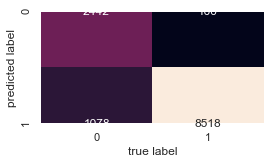

In [43]:
print_confusion_matrix(testY, predicted_test_y)

#### We can build Classifier using other algorithms e.g SVM

In [44]:
from sklearn.svm import SVC

In [45]:
#Train an SVM with default parameters
svc = SVC()
svc.fit(trainX_ct, trainY)

C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
#Calculate accuracy on Test Dataset
predicted_test_y_svc = svc.predict(testX_ct)
metrics.accuracy_score(testY, predicted_test_y_svc)

0.9550173010380623

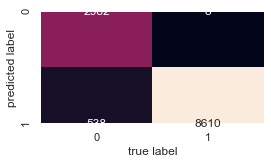

In [47]:
print_confusion_matrix(testY, predicted_test_y_svc)

### 5. Using TF-IDF Vectorizer

In [48]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer(analyzer=get_stemmed_text, min_df=5)

In [49]:
#Feed data to CountVectorizer
tvect.fit(trainX)

#Check the vocablury size
len(tvect.vocabulary_)

4816

In [50]:
#Convert Training into numerical values
trainX_tfidf = tvect.transform(trainX)
trainX_tfidf.shape

(36411, 4816)

In [51]:
#Convert Test SMSes also to tf-idf vectors
testX_tfidf = tvect.transform(testX)

In [52]:
print(trainX_tfidf[0])

  (0, 4715)	0.18520474159794562
  (0, 4251)	0.17591029927632282
  (0, 4234)	0.290836529860184
  (0, 3637)	0.21631245349087377
  (0, 3459)	0.08492056185602116
  (0, 3129)	0.05912574186271535
  (0, 2968)	0.5070231126832099
  (0, 2276)	0.17573415392483757
  (0, 2267)	0.1782413775329816
  (0, 2216)	0.11577318919837434
  (0, 2173)	0.5601556115777517
  (0, 2131)	0.2654168637567183
  (0, 1909)	0.11873841806402083
  (0, 1908)	0.0934792700223345
  (0, 732)	0.18141509774181266
  (0, 579)	0.1399037402893451


Build an SVM

In [53]:
svc_tf = SVC()
svc_tf.fit(trainX_tfidf, trainY)

C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
#Calculate accuracy on Test Dataset
predicted_test_y_svc_tf = svc_tf.predict(testX_tfidf)
metrics.accuracy_score(testY, predicted_test_y_svc_tf)

0.7100016477179107

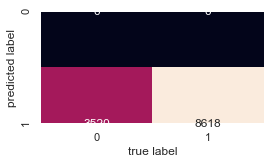

In [55]:
print_confusion_matrix(testY, predicted_test_y_svc_tf)

In [56]:
svc_tf_b = SVC(class_weight='balanced')
svc_tf_b.fit(trainX_tfidf, trainY)

C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
#Calculate accuracy on Test Dataset
predicted_test_y_svc_tf_b = svc_tf_b.predict(testX_tfidf)
metrics.accuracy_score(testY, predicted_test_y_svc_tf_b)

0.7132146976437634

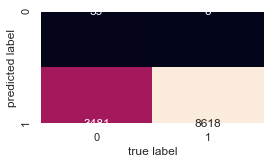

In [58]:
print_confusion_matrix(testY, predicted_test_y_svc_tf_b)

TF-IDF with ngram



```
tvect_ngram = TfidfVectorizer(ngram_range=(1,2)) 
#Tokens can be made of 1 word or 2 words
```

The movie was awesome

Words as tokens = "The", "movie", "was", awesome"

ngrams (1,2) -> 
- "The", 
- "movie", 
- "was", 
- "awesome", 
- "The movie", 
- "movie was", 
- "was awesome"

### 7. Building a Deep Learning Model

In [60]:
import tensorflow as tf

We will use CountVectorizer features in this case. This can be replaced by TF-IDF features

In [61]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [62]:
#Add hidden layers
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(tvect.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Add Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [63]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [64]:
model.fit(trainX_tfidf, trainY,
           validation_data=(testX_tfidf, testY), 
           epochs=10, batch_size=32)

Epoch 1/10


InvalidArgumentError:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 242, in __call__
    return func(device, token, args)

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 131, in __call__
    ret = self._func(*args)

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 513, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 513, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 512, in slice_array
    contiguous=contiguous)

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 391, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\samu0315\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_859]

Function call stack:
train_function


In [65]:
#Convert csr sparse matrix to dense
model.fit(trainX_tfidf.todense(), trainY,
           validation_data=(testX_tfidf.todense(), testY), 
           epochs=10, batch_size=32)

Epoch 1/10
1138/1138 [==============================] - 5s 5ms/step - loss: 0.0778 - acc: 0.9695 - val_loss: 0.0313 - val_acc: 0.9888
Epoch 2/10
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0218 - acc: 0.9926 - val_loss: 0.0334 - val_acc: 0.9874
Epoch 3/10
1138/1138 [==============================] - 7s 6ms/step - loss: 0.0140 - acc: 0.9953 - val_loss: 0.0363 - val_acc: 0.9876
Epoch 4/10
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0094 - acc: 0.9966 - val_loss: 0.0406 - val_acc: 0.9877
Epoch 5/10
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0461 - val_acc: 0.9868
Epoch 6/10
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0054 - acc: 0.9982 - val_loss: 0.0510 - val_acc: 0.9875
Epoch 7/10
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0036 - acc: 0.9987 - val_loss: 0.0569 - val_acc: 0.9863
Epoch 8/10
1138/1138 [==============================] - 6s 5ms

In [66]:
#Calculate accuracy on Test Dataset
predicted_test_y_dense = model.predict(testX_tfidf.todense())

#Convert predictions into binary
predicted_test_y_dense_binary = predicted_test_y_dense >= 0.5

#Calculate score
metrics.accuracy_score(testY, predicted_test_y_dense_binary)

0.9871478002965892

In [67]:
model.evaluate(testX_tfidf.todense(), testY)

380/380 [==============================] - 1s 2ms/step - loss: 0.0670 - acc: 0.9871


[0.06699135154485703, 0.9871478080749512]

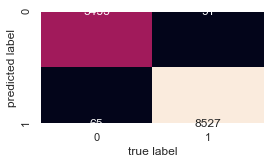

In [68]:
print_confusion_matrix(testY, predicted_test_y_dense_binary)